In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [9]:
d = {'a':7, 'b':9, 'C':12} # zodynas
d1 = {'a':5, 'b':11, 'C':15} # zodynas
data =[d,d1] # zodynu sarasas

df = pd.DataFrame(data=data)
df

,a,b,C
0,7,9,12
1,5,11,15


In [13]:
d = {'AB':np.random.rand(10), 'BC':np.random.randint(10,100,10)} # zodynas, kurio elementai yra generuojamas duomenu masyvas

df = pd.DataFrame(data=d)
df

,AB,BC
0,0.700295,90
1,0.419280,59
2,0.139355,40
3,0.326352,74
4,0.923342,55
5,0.240497,89
6,0.073854,90
7,0.138278,18
8,0.313407,99
9,0.415889,89


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import time
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

In [11]:
puslapio_nr = [2,3,4]
opcijos = Options()
data = []

for puslapis in puslapio_nr:
    url = f'https://www.aruodas.lt/butai/puslapis/{puslapis}'
    driver = webdriver.Chrome(options=opcijos)
    driver.get(url)
    time.sleep(35)
    source = driver.page_source
    bs = BeautifulSoup(source, 'html.parser')
    ResultSet = bs.find_all('div', {'class':'advert-flex'})
    print(len(ResultSet))

    for skelbimas in ResultSet:
        try:
            price_element= skelbimas.find('div', {'class':'price'})
            tag = price_element.find('span')
            kaina = tag.contents[0]

            kvm_kaina_element= skelbimas.find('div', {'class':'price'})
            tag1 = kvm_kaina_element.find('span', {'class':'price-pm-v2'})
            kvm_kaina =tag1.contents[0]

            address_element = skelbimas.find('div', {'class':'list-adress-v2'})
            tag2 = address_element.find('h3').find('a', href=True)
            linkas = tag2['href']
            tekstas = tag2.contents

            plotas_element= skelbimas.find('div', {'class':'list-AreaOverall-v2 list-detail-v2'})
            plotas =plotas_element.contents[0]

            kambasiu_sk_element= skelbimas.find('div', {'class':'list-RoomNum-v2 list-detail-v2'})
            kambariu_sk =kambasiu_sk_element.contents[0]

            f = ''
            for i in kaina:
                f = f + str(i).strip()
            kaina = f.replace('€', '')

            f1 = ''
            for a in kvm_kaina:
                f1 = f1 + str(a).strip()
            kvm_kaina = f1[:-4]

            f2 = ''
            for i in tekstas:
                f2 = f2 + str(i).strip()
            tekstas = f2.replace('<br/>', ', ')

            f3 = ''
            for a in plotas:
                f3 = f3 + str(a).strip()
            plotas = f3

            f4 = ''
            for i in kambariu_sk:
                f4 = f4 + str(i).strip()
            kambariu_sk = f4

            d = {'buto _kaina':kaina, 'kvadrato_kaina': kvm_kaina, 'adresas':tekstas, 'plotas':plotas, 'kambariu_skaicius':kambariu_sk} # pasidarome zodyna su duomenimis
            data.append(d)
            print(d)

        except Exception as klaida:
            print(klaida)
    driver.close() 

df = pd.DataFrame(data=data)
df.to_csv('Aruodas 2024_04_22.csv', header=True, index=False, sep=';') # sukeliam sugeneruotus duomenis i sukuriama faila

27
'NoneType' object has no attribute 'find'
'NoneType' object has no attribute 'find'
{'buto _kaina': '199000', 'kvadrato_kaina': '4095', 'adresas': 'Palanga, Palanga, Vanagupės g.', 'plotas': '48.59', 'kambariu_skaicius': '2'}
{'buto _kaina': '240529', 'kvadrato_kaina': '3733', 'adresas': 'Vilnius, Žirmūnai, Kareivių g.', 'plotas': '64.44', 'kambariu_skaicius': '3'}
{'buto _kaina': '200860', 'kvadrato_kaina': '3453', 'adresas': 'Vilnius, Burbiškės, Burbiškių g.', 'plotas': '58.17', 'kambariu_skaicius': '3'}
{'buto _kaina': '139900', 'kvadrato_kaina': '2439', 'adresas': 'Vilnius, Antakalnis, Duburio g.', 'plotas': '57.37', 'kambariu_skaicius': '2'}
{'buto _kaina': '47500', 'kvadrato_kaina': '2317', 'adresas': 'Kaunas, Vilijampolė, Raudondvario pl.', 'plotas': '20.5', 'kambariu_skaicius': '2'}
{'buto _kaina': '390000', 'kvadrato_kaina': '6725', 'adresas': 'Vilnius, Senamiestis, Teatro g.', 'plotas': '57.99', 'kambariu_skaicius': '2'}
{'buto _kaina': '168500', 'kvadrato_kaina': '2462', 

In [ ]:
# suraskite, kiek iš atrinktų butų buvo pagal kainą pigūs, brangūs, neįperkami. Kriterijus - 1 kv metro kaina iki 1 VDu - pigūs, iki 3 VDU - brangūs, daugiau nei 3 VDU - neįperkami.
# pavaizduokite su boxplotais kainų už 1 kv pasiskirstymą nuo kambarių skaičiaus.
# Pavaizduokiet tokią informaciją: atrinktų butų kainų pasiskirstymą tarp miestų.
# pavaizduokite tokią informaciją - kiek buvo sklebimų per skirtingus miestus jūsų atrankoje?

In [56]:
# suraskite, kiek iš atrinktų butų buvo pagal kainą pigūs, brangūs, neįperkami. Kriterijus - 1 kv metro kaina iki 1 VDu - pigūs, iki 3 VDU - brangūs, daugiau nei 3 VDU - neįperkami.
aruodas = pd.read_csv('Aruodas 2024_04_22.csv', sep=';')
aruodas = aruodas[['buto _kaina', 'kvadrato_kaina', 'adresas', 'plotas', 'kambariu_skaicius']]
aruodas.head()

,buto _kaina,kvadrato_kaina,adresas,plotas,kambariu_skaicius
0,199000,4095,"Palanga, Palanga, Vanagupės g.",48.59,2
1,240529,3733,"Vilnius, Žirmūnai, Kareivių g.",64.44,3
2,200860,3453,"Vilnius, Burbiškės, Burbiškių g.",58.17,3
3,139900,2439,"Vilnius, Antakalnis, Duburio g.",57.37,2
4,47500,2317,"Kaunas, Vilijampolė, Raudondvario pl.",20.50,2


In [116]:
vdu = 1902

def kainos_reziai(eur):
    if eur <= vdu:
        return 'pigus'
    elif eur > vdu and eur <= 3*vdu:
        return 'brangus'
    else:
        return 'neįperkamas'
    
aruodas['kainos_rėžiai'] = aruodas['kvadrato_kaina'].apply(kainos_reziai)
aruodas.head()

,buto _kaina,kvadrato_kaina,adresas,plotas,kambariu_skaicius,kainos_rėžiai,miestas
0,199000,4095,"Palanga, Palanga, Vanagupės g.",48.59,2,brangus,Palanga
1,240529,3733,"Vilnius, Žirmūnai, Kareivių g.",64.44,3,brangus,Vilnius
2,200860,3453,"Vilnius, Burbiškės, Burbiškių g.",58.17,3,brangus,Vilnius
3,139900,2439,"Vilnius, Antakalnis, Duburio g.",57.37,2,brangus,Vilnius
4,47500,2317,"Kaunas, Vilijampolė, Raudondvario pl.",20.50,2,brangus,Kaunas


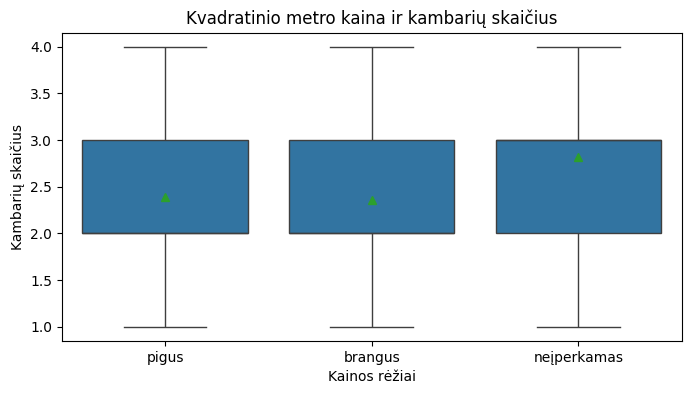

In [117]:
# pavaizduokite su boxplotais kainų už 1 kv pasiskirstymą nuo kambarių skaičiaus.

fig,grafikas = plt.subplots(figsize=[8,4])

grafikas = sns.boxplot(data=aruodas.sort_values(by='kambariu_skaicius'), x='kainos_rėžiai', y='kambariu_skaicius', showfliers=False, ax=grafikas, showmeans=True) # ?? irasius showmeans=True neranda showmeans- nerado nes buvo irasytra be boxplot, o boxenplot

grafikas.set_title('Kvadratinio metro kaina ir kambarių skaičius')
grafikas.set_xlabel("Kainos rėžiai")
grafikas.set_ylabel("Kambarių skaičius")

plt.show()

In [118]:
# Pavaizduokiet tokią informaciją: atrinktų butų kainų pasiskirstymą tarp miestų.

def miestas(adresas):
    return adresas.split(',')[0]

aruodas['miestas'] = aruodas['adresas'].apply(miestas)
aruodas.head()

,buto _kaina,kvadrato_kaina,adresas,plotas,kambariu_skaicius,kainos_rėžiai,miestas
0,199000,4095,"Palanga, Palanga, Vanagupės g.",48.59,2,brangus,Palanga
1,240529,3733,"Vilnius, Žirmūnai, Kareivių g.",64.44,3,brangus,Vilnius
2,200860,3453,"Vilnius, Burbiškės, Burbiškių g.",58.17,3,brangus,Vilnius
3,139900,2439,"Vilnius, Antakalnis, Duburio g.",57.37,2,brangus,Vilnius
4,47500,2317,"Kaunas, Vilijampolė, Raudondvario pl.",20.50,2,brangus,Kaunas


C:\Users\Dovydaiciai\AppData\Local\Temp\ipykernel_13588\2998912551.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafikas.set_xticklabels(grafikas.get_xticklabels(),rotation=90)


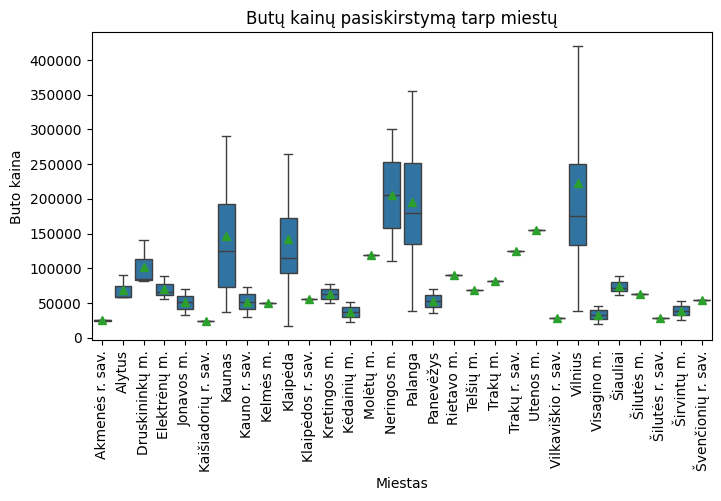

In [119]:
fig,grafikas = plt.subplots(figsize=[8,4])

grafikas = sns.boxplot(data=aruodas.sort_values(by='miestas'), x='miestas', y='buto _kaina', showfliers=False, showmeans=True, ax=grafikas) 

grafikas.set_title('Butų kainų pasiskirstymą tarp miestų')
grafikas.set_xlabel("Miestas")
grafikas.set_ylabel("Buto kaina")
grafikas.set_xticklabels(grafikas.get_xticklabels(),rotation=90)

plt.show()

In [121]:
# pavaizduokite tokią informaciją - kiek buvo sklebimų per skirtingus miestus jūsų atrankoje?

aruodas2 = aruodas['miestas'].value_counts()
aruodas2.head()

miestas
Vilnius           125
Kaunas             33
Palanga            25
Klaipėda           24
Druskininkų m.      3
Name: count, dtype: int64

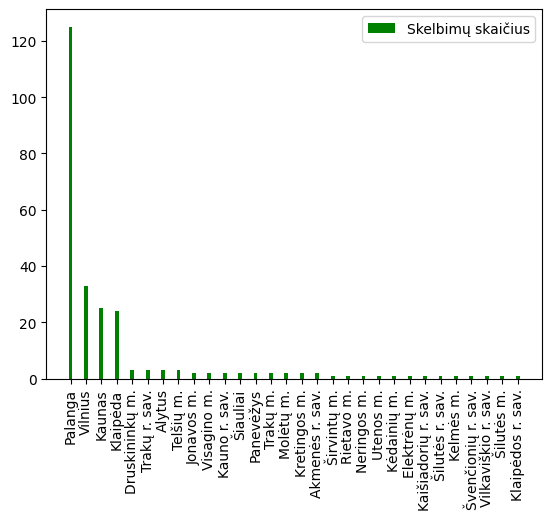

In [122]:
fig, ax = plt.subplots()

ax.bar(aruodas['miestas'].unique(),aruodas['miestas'].value_counts(), color= 'Green', width= 0.25, label = "Skelbimų skaičius")
ax.tick_params(axis='x', rotation=90)
ax.legend(loc='best')

plt.show()